学习卷积神经网络～

# 图像卷积

In [1]:
import torch
from torch import nn

def corr2d(X, K):  #@save
    """计算二维互相关运算"""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

In [ ]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

# tensor([[19., 25.],
#         [37., 43.]])

tensor([[19., 25.],
        [37., 43.]])

In [3]:
class Conv2D(nn.Module):
    """二维卷积层"""
    def __init__(self, kernel_size):
        super(Conv2D, self).å__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, X):
        return corr2d(X, self.weight) + self.bias

In [ ]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

# tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
#         [1., 1., 0., 0., 0., 0., 1., 1.],
#         [1., 1., 0., 0., 0., 0., 1., 1.],
#         [1., 1., 0., 0., 0., 0., 1., 1.],
#         [1., 1., 0., 0., 0., 0., 1., 1.],
#         [1., 1., 0., 0., 0., 0., 1., 1.]])

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [6]:
K = torch.tensor([[1.0, -1.0]])

In [ ]:
Y = corr2d(X, K)
Y

# tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
#         [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
#         [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
#         [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
#         [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
#         [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [ ]:
corr2d(X.t(), K)

# tensor([[0., 0., 0., 0., 0.],
#         [0., 0., 0., 0., 0.],
#         [0., 0., 0., 0., 0.],
#         [0., 0., 0., 0., 0.],
#         [0., 0., 0., 0., 0.],
#         [0., 0., 0., 0., 0.],
#         [0., 0., 0., 0., 0.],
#         [0., 0., 0., 0., 0.]])

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [ ]:
# 构造一个二维卷积层，它具有1个输出通道和形状为（1，2）的卷积核
conv2d = nn.Conv2d(1,1, kernel_size=(1, 2), bias=False)

# 这个二维卷积层使用四维输入和输出格式（批量大小、通道、高度、宽度），
# 其中批量大小和通道数都为1
X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))
lr = 3e-2  # 学习率

for i in range(10):
    Y_hat = conv2d(X)
    l = (Y_hat - Y) ** 2
    conv2d.zero_grad()
    l.sum().backward()
    # 迭代卷积核
    conv2d.weight.data[:] -= lr * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'epoch {i+1}, loss {l.sum():.3f}')

# epoch 2, loss 9.240
# epoch 4, loss 1.559
# epoch 6, loss 0.265
# epoch 8, loss 0.046
# epoch 10, loss 0.008

epoch 2, loss 9.240
epoch 4, loss 1.559
epoch 6, loss 0.265
epoch 8, loss 0.046
epoch 10, loss 0.008


In [ ]:
conv2d.weight.data.reshape((1, 2))

# tensor([[ 0.9810, -0.9875]])

tensor([[ 0.9810, -0.9875]])

# 填充和步幅

In [ ]:
import torch
from torch import nn


# 为了方便起见，我们定义了一个计算卷积层的函数。
# 此函数初始化卷积层权重，并对输入和输出提高和缩减相应的维数
def comp_conv2d(conv2d, X):
    # 这里的（1，1）表示批量大小和通道数都是1
    X = X.reshape((1, 1) + X.shape)
    Y = conv2d(X)
    # 省略前两个维度：批量大小和通道
    return Y.reshape(Y.shape[2:])

# 请注意，这里每边都填充了1行或1列，因此总共添加了2行或2列
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
comp_conv2d(conv2d, X).shape

# torch.Size([8, 8])

torch.Size([8, 8])

In [ ]:
conv2d = nn.Conv2d(1, 1, kernel_size=(5, 3), padding=(2, 1))
comp_conv2d(conv2d, X).shape

# torch.Size([8, 8])

torch.Size([8, 8])

In [ ]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

# torch.Size([4, 4])

torch.Size([4, 4])

In [ ]:
conv2d = nn.Conv2d(1, 1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

# torch.Size([2, 2])

torch.Size([2, 2])

# 多输入多输出通道

In [1]:
import torch
from d2l import torch as d2l

def corr2d_multi_in(X, K):
    # 先遍历“X”和“K”的第0个维度（通道维度），再把它们加在一起
    return sum(d2l.corr2d(x, k) for x, k in zip(X, K))

In [2]:
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

In [3]:
for i in K:
    print(i)

tensor([[0., 1.],
        [2., 3.]])
tensor([[1., 2.],
        [3., 4.]])


In [4]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

# tensor([[ 56.,  72.],
#         [104., 120.]])

tensor([[ 56.,  72.],
        [104., 120.]])

In [5]:
def corr2d_multi_in_out(X, K):
    # 迭代“K”的第0个维度，每次都对输入“X”执行互相关运算。
    # 最后将所有结果都叠加在一起
    return torch.stack([corr2d_multi_in(X, k) for k in K], 0)

In [6]:
K = torch.stack((K, K + 1, K + 2), 0)
K.shape

# torch.Size([3, 2, 2, 2])

torch.Size([3, 2, 2, 2])

In [7]:
print(K)

tensor([[[[0., 1.],
          [2., 3.]],

         [[1., 2.],
          [3., 4.]]],


        [[[1., 2.],
          [3., 4.]],

         [[2., 3.],
          [4., 5.]]],


        [[[2., 3.],
          [4., 5.]],

         [[3., 4.],
          [5., 6.]]]])


In [9]:
corr2d_multi_in_out(X, K)

# tensor([[[ 56.,  72.],
#          [104., 120.]],

#         [[ 76., 100.],
#          [148., 172.]],

#         [[ 96., 128.],
#          [192., 224.]]])

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

In [10]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape((c_i, h * w))
    K = K.reshape((c_o, c_i))
    # 全连接层中的矩阵乘法
    Y = torch.matmul(K, X)
    return Y.reshape((c_o, h, w))

In [11]:
X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))

Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(torch.abs(Y1 - Y2).sum()) < 1e-6

# 汇聚层

In [12]:
import torch
from torch import nn
from d2l import torch as d2l

def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [13]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

# tensor([[4., 5.],
#         [7., 8.]])

tensor([[4., 5.],
        [7., 8.]])

In [14]:
pool2d(X, (2, 2), 'avg')

# tensor([[2., 3.],
#         [5., 6.]])

tensor([[2., 3.],
        [5., 6.]])

In [15]:
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

# tensor([[[[ 0.,  1.,  2.,  3.],
#           [ 4.,  5.,  6.,  7.],
#           [ 8.,  9., 10., 11.],
#           [12., 13., 14., 15.]]]])

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [16]:
pool2d = nn.MaxPool2d(3)
pool2d(X)

# tensor([[[[10.]]]])

tensor([[[[10.]]]])

In [17]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

# tensor([[[[ 5.,  7.],
#           [13., 15.]]]])

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [18]:
pool2d = nn.MaxPool2d(2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [19]:
pool2d = nn.MaxPool2d((2, 3), stride=(2, 3), padding=(0, 1))
pool2d(X)

# tensor([[[[ 5.,  7.],
#           [13., 15.]]]])

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [20]:
X = torch.cat((X, X + 1), 1)
X

# tensor([[[[ 0.,  1.,  2.,  3.],
#           [ 4.,  5.,  6.,  7.],
#           [ 8.,  9., 10., 11.],
#           [12., 13., 14., 15.]],

#          [[ 1.,  2.,  3.,  4.],
#           [ 5.,  6.,  7.,  8.],
#           [ 9., 10., 11., 12.],
#           [13., 14., 15., 16.]]]])

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [22]:
X.shape

torch.Size([1, 2, 4, 4])

In [21]:
torch.cat((X, X + 1), 0).shape, torch.cat((X, X + 1), 1).shape



(torch.Size([2, 2, 4, 4]), torch.Size([1, 4, 4, 4]))

In [23]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

# tensor([[[[ 5.,  7.],
#           [13., 15.]],

#          [[ 6.,  8.],
#           [14., 16.]]]])

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

# LeNet

In [25]:
import torch
from torch import nn

net = nn.Sequential(
    # 第1个卷积块
    nn.Conv2d(1, 6, kernel_size=5, padding=2),  # 卷积层
    nn.Sigmoid(),  # 激活函数
    nn.AvgPool2d(kernel_size=2, stride=2),  # 平均池化层

    # 第2个卷积块
    nn.Conv2d(6, 16, kernel_size=5),  # 卷积层
    nn.Sigmoid(),  # 激活函数
    nn.AvgPool2d(kernel_size=2, stride=2),  # 平均池化层

    # 线性网络
    nn.Flatten(),  # 展平层
    nn.Linear(16 * 5 * 5, 120),  # 全连接
    nn.Sigmoid(),  # 激活函数
    nn.Linear(120, 84),  # 全连接
    nn.Sigmoid(),  # 激活函数
    nn.Linear(84, 10)  # 全连接
)

In [26]:
X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)

# Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
# Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
# AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
# Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
# Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
# AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
# Flatten output shape: 	 torch.Size([1, 400])
# Linear output shape: 	 torch.Size([1, 120])
# Sigmoid output shape: 	 torch.Size([1, 120])
# Linear output shape: 	 torch.Size([1, 84])
# Sigmoid output shape: 	 torch.Size([1, 84])
# Linear output shape: 	 torch.Size([1, 10])

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


In [27]:
# 读取Fashion-MNIST数据集
batch_size = 256

import torchvision
from torchvision import transforms
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="./data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="./data", train=False, transform=trans, download=True)
train_iter = torch.utils.data.DataLoader(
    mnist_train, batch_size=batch_size, shuffle=True)
test_iter = torch.utils.data.DataLoader(
    mnist_test, batch_size=batch_size, shuffle=False)

In [28]:
# 检查加速器mps
torch.backends.mps.is_available()

True

epoch 1, loss 2.304, train acc 0.100, test acc 0.100
epoch 2, loss 2.303, train acc 0.100, test acc 0.100
epoch 3, loss 2.128, train acc 0.584, test acc 0.579
epoch 4, loss 1.835, train acc 0.695, test acc 0.686
epoch 5, loss 1.760, train acc 0.716, test acc 0.702
epoch 6, loss 1.686, train acc 0.803, test acc 0.788
epoch 7, loss 1.653, train acc 0.800, test acc 0.786
epoch 8, loss 1.640, train acc 0.823, test acc 0.808
epoch 9, loss 1.627, train acc 0.843, test acc 0.832
epoch 10, loss 1.621, train acc 0.853, test acc 0.835


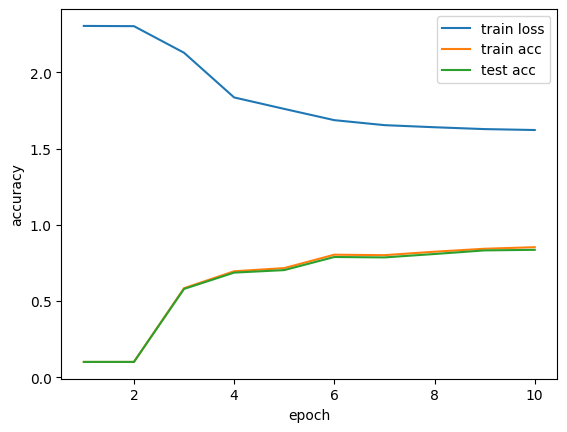

In [35]:
# 加载必要的库
import torch
from torch import nn

# 加入softmax层
net = nn.Sequential(
    # 第1个卷积块
    nn.Conv2d(1, 6, kernel_size=5, padding=2),  # 卷积层
    nn.Sigmoid(),  # 激活函数
    nn.AvgPool2d(kernel_size=2, stride=2),  # 平均池化层

    # 第2个卷积块
    nn.Conv2d(6, 16, kernel_size=5),  # 卷积层
    nn.Sigmoid(),  # 激活函数
    nn.AvgPool2d(kernel_size=2, stride=2),  # 平均池化层

    # 线性网络
    nn.Flatten(),  # 展平层
    nn.Linear(16 * 5 * 5, 120),  # 全连接
    nn.Sigmoid(),  # 激活函数
    nn.Linear(120, 84),  # 全连接
    nn.Sigmoid(),  # 激活函数
    nn.Linear(84, 10),  # 全连接

    # softmax输出层
    nn.Softmax(dim=1)  # softmax层
)

# 定义准确率计算函数
def evaluate_accuracy(data_iter, net, device=None):
    """使用GPU计算模型在数据集上的精度"""
    if isinstance(net, nn.Module):
        net.eval()  # 设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    
    # 定义正确预测的数量和总样本数
    accury_sum, n = 0, 0
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # 如果X是一个列表，则将其转换为张量
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            # 计算预测结果
            y_hat = net(X)
            # 累加正确预测的数量
            accury_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
    return accury_sum / n  # 返回精度

# 计算训练集和测试集的精度，训练集损失函数
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device=None):
    """训练模型"""
    # 将模型移动到指定设备
    if device is None:
        device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
    net.to(device)  # 将模型移动到设备

    # 初始化参数
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)

    # 定义损失函数和优化器
    loss = nn.CrossEntropyLoss(reduction="none")  # 损失函数
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)  # 优化器

    # 定义列表存储损失函数，训练集精度和测试集精度
    train_loss, train_acc, test_acc = [], [], []

    # 训练循环
    for epoch in range(num_epochs):
        net.train()  # 设置为训练模式
        train_l_sum, n = 0, 0
        for X, y in train_iter:
            if isinstance(X, list):
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)

            # 前向传播
            y_hat = net(X)
            l = loss(y_hat, y).sum()  # 计算平均损失
            train_l_sum += l.item()
            n += y.shape[0]

            # 反向传播和优化
            optimizer.zero_grad()  # 清零梯度
            l.backward()  # 计算梯度
            optimizer.step()  # 更新参数

        # 计算训练集精度
        train_loss.append(train_l_sum / n)

        # 计算训练集精度
        train_acc.append(evaluate_accuracy(train_iter, net, device))

        # 计算测试集精度
        test_acc.append(evaluate_accuracy(test_iter, net, device))

        print(f'epoch {epoch + 1}, loss {train_loss[-1]:.3f}, '
              f'train acc {train_acc[-1]:.3f}, '
              f'test acc {test_acc[-1]:.3f}')
    
    # 使用plt原生图
    import matplotlib.pyplot as plt
    plt.plot(range(1, num_epochs + 1), train_loss, label='train loss')
    plt.plot(range(1, num_epochs + 1), train_acc, label='train acc')
    plt.plot(range(1, num_epochs + 1), test_acc, label='test acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

    return train_loss, train_acc, test_acc

# 训练模型
num_epochs, lr = 10, 0.1
train_loss, train_acc, test_acc = train_ch6(net, train_iter, test_iter, num_epochs, lr)

# epoch 1, loss 2.304, train acc 0.100, test acc 0.100
# epoch 2, loss 2.303, train acc 0.100, test acc 0.100
# epoch 3, loss 2.128, train acc 0.584, test acc 0.579
# epoch 4, loss 1.835, train acc 0.695, test acc 0.686
# epoch 5, loss 1.760, train acc 0.716, test acc 0.702
# epoch 6, loss 1.686, train acc 0.803, test acc 0.788
# epoch 7, loss 1.653, train acc 0.800, test acc 0.786
# epoch 8, loss 1.640, train acc 0.823, test acc 0.808
# epoch 9, loss 1.627, train acc 0.843, test acc 0.832
# epoch 10, loss 1.621, train acc 0.853, test acc 0.835

In [37]:
!nvidia-smi
# zsh:1: command not found: nvidia-smi

zsh:1: command not found: nvidia-smi


In [38]:
torch.device("mps")

device(type='mps')

In [39]:
torch.cuda.device_count()

# 0

0

In [40]:
torch.mps.device_count()

# 1

1

In [41]:
def try_gpu(i=0):  #@save
    """如果存在，则返回gpu(i)，否则返回cpu()"""
    if torch.cuda.device_count() >= i + 1:
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')

def try_all_gpus():  #@save
    """返回所有可用的GPU，如果没有GPU，则返回[cpu(),]"""
    devices = [torch.device(f'cuda:{i}')
             for i in range(torch.cuda.device_count())]
    return devices if devices else [torch.device('cpu')]

try_gpu(), try_gpu(10), try_all_gpus()

(device(type='cpu'), device(type='cpu'), [device(type='cpu')])

In [42]:
x = torch.tensor([1, 2, 3])
x.device

# device(type='cpu')

device(type='cpu')

In [44]:
X = torch.ones(2, 3, device="mps")
X

# tensor([[1., 1., 1.],
#         [1., 1., 1.]], device='mps:0')

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='mps:0')

In [45]:
Y = torch.rand(2, 3, device=try_gpu(1))
Y

# tensor([[0.0355, 0.8498, 0.8251],
#         [0.8005, 0.7753, 0.0666]])

tensor([[0.0355, 0.8498, 0.8251],
        [0.8005, 0.7753, 0.0666]])

In [47]:
net = nn.Sequential(nn.Linear(3, 1))
net = net.to(device="mps")

In [48]:
X = torch.ones(2, 3, device="mps")
net(X)

# tensor([[0.1147],
#         [0.1147]], device='mps:0', grad_fn=<LinearBackward0>)

tensor([[0.1147],
        [0.1147]], device='mps:0', grad_fn=<LinearBackward0>)

In [49]:
net[0].weight.data.device

# net[0].weight.data.device

device(type='mps', index=0)